# **Netflix Buisness Case**

#Start of the Business Case

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Loading the Dataset in CSV format to Pandas Dataframe and basic data analyis.

In [ ]:
# Importing the data from the csv file.
netflix = pd.read_csv('netflix.csv')
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Getting basic information of the dataframe.

In [ ]:
#Getting basic information about the data
netflix.shape ,
netflix.info() ,
netflix.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Handling the Null values from the respective columns provided from the dataframe info().

In [ ]:
#filling the Null/NaN values with Unknown in column director, cast and country and Unavailable in column date_added , rating and duration
netflix['director'].fillna('Unknown_Director', inplace= True)
netflix['cast'].fillna('Unknown_cast', inplace= True)
netflix['country'].fillna('Unknown_Country', inplace = True)
netflix['date_added'].fillna(pd.NaT, inplace= True)
netflix['rating'].fillna('Unavailable', inplace = True)
netflix['duration'].fillna('Unavailable', inplace= True)
# netflix.head()

# Category wise data Analysis:
##Variaion of Content Creation across availabel content on the platform. (Bivariate)

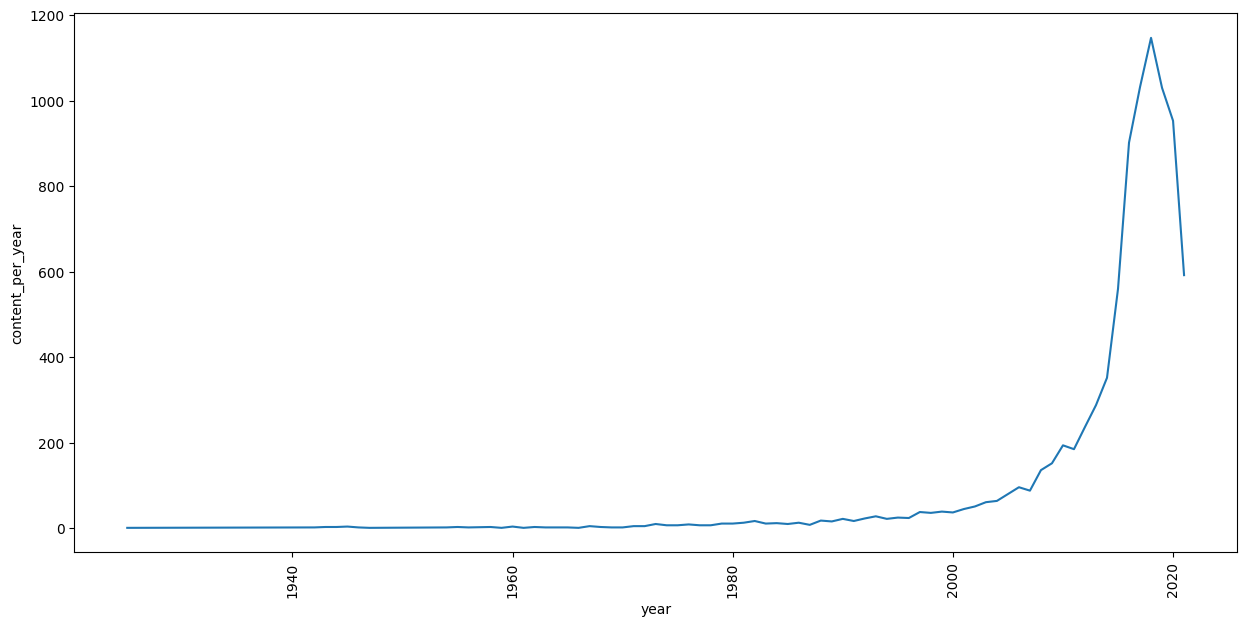

In [ ]:
#Count of the ahows across the year category
yearwise_data = pd.DataFrame(netflix['release_year'].value_counts().reset_index())
yearwise_data.columns = ['year', 'content_per_year']
plt.figure(figsize=(15,7))
sns.lineplot(data = yearwise_data,x = 'year', y = 'content_per_year')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
yearwise_data , yearwise_data1

(    year  content_per_year
 0   2018              1147
 1   2017              1032
 2   2019              1030
 3   2020               953
 4   2016               902
 ..   ...               ...
 69  1959                 1
 70  1925                 1
 71  1961                 1
 72  1947                 1
 73  1966                 1
 
 [74 rows x 2 columns],
      release_year     type  count_show_id
 0            1925  TV Show              1
 1            1942    Movie              2
 2            1943    Movie              3
 3            1944    Movie              3
 4            1945    Movie              3
 ..            ...      ...            ...
 114          2019  TV Show            397
 115          2020    Movie            517
 116          2020  TV Show            436
 117          2021    Movie            277
 118          2021  TV Show            315
 
 [119 rows x 3 columns])

## Variaion of Content Creation along with type of the content across availabel content on the platform. (Bivariate)

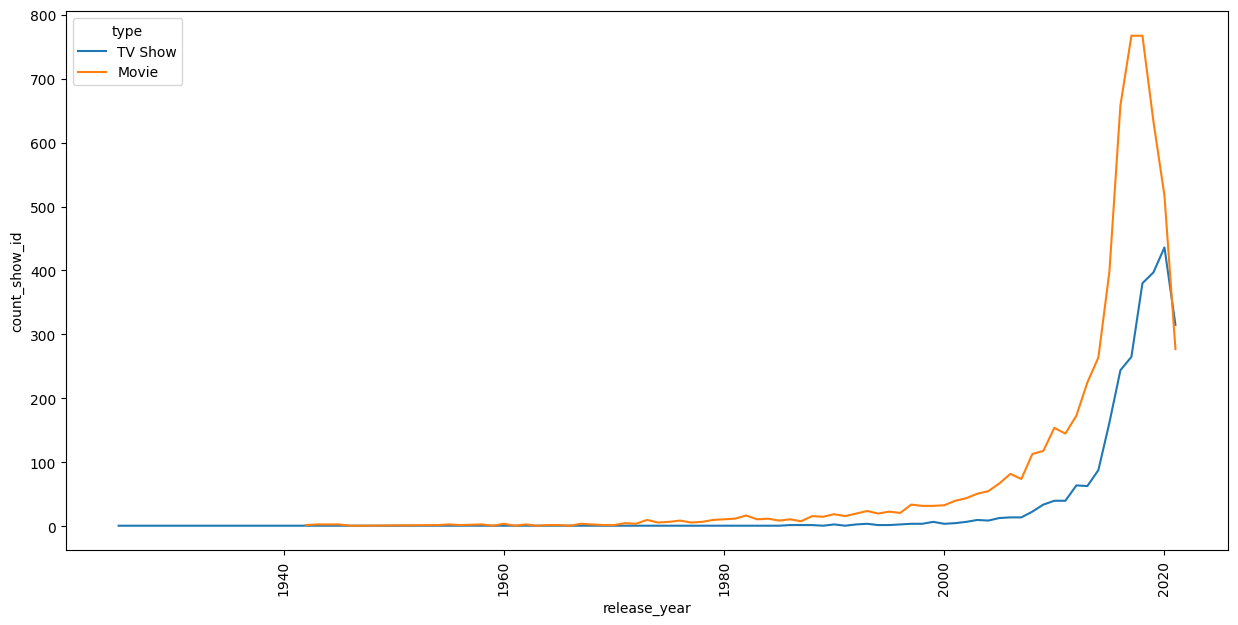

In [ ]:
#Comparative Count of Movies and TV-Series spread across the release_year
yearwise_data1 =pd.DataFrame(netflix.groupby(['release_year', 'type']).agg({'show_id' : 'count'})).reset_index()
yearwise_data1.columns = ['release_year', 'type', 'count_show_id']
plt.figure(figsize=(15,7))
sns.lineplot(data=yearwise_data1,x = 'release_year' , y = 'count_show_id' , hue = 'type')
plt.xticks(rotation = 90)
plt.show()

## Transferring relevant data from rating attribute to duration attribute.

In [ ]:
a = netflix[netflix['rating'].str.contains('min')].reset_index()
for i in range(len(a)):
    netflix.loc[a.iloc[i,0],'duration'] = a.loc[i,'rating']
    netflix.loc[a.iloc[i,0],'rating'] = 'Unavailable'
# netflix[netflix['rating'].str.contains('min')]

## Categorical Analysis according to 'rating' category. (Univariate)

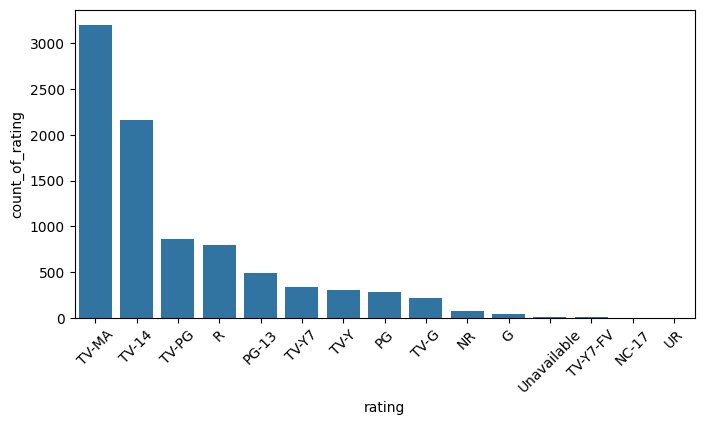

In [ ]:
# Count of the each show across the ratings category
rating_data = pd.DataFrame(netflix['rating'].value_counts().reset_index())
rating_data.columns = ['rating', 'count_of_rating']
plt.figure(figsize=(8,4))
sns.barplot(data = rating_data, x = 'rating' , y ='count_of_rating')
plt.xticks(rotation = 45)
plt.show()

In [ ]:
rating_data

,rating,count_of_rating
0,TV-MA,3207
1,TV-14,2160
2,TV-PG,863
3,R,799
4,PG-13,490
5,TV-Y7,334
6,TV-Y,307
7,PG,287
8,TV-G,220
9,NR,80


## Converting column date_added into the Year, Month , day and Week columns

In [ ]:
netflix['date_added'] = pd.to_datetime(netflix['date_added'])
netflix['year'] = netflix['date_added'].dt.year
netflix['month'] = netflix['date_added'].dt.month_name()
netflix['day'] = netflix['date_added'].dt.day
netflix['week'] = netflix['date_added'].dt.isocalendar().week

##Count of the ahows across the addition week of the year category and Comparative Count of Movies and TV-Series spread across addition week and month of year (Bivariate)

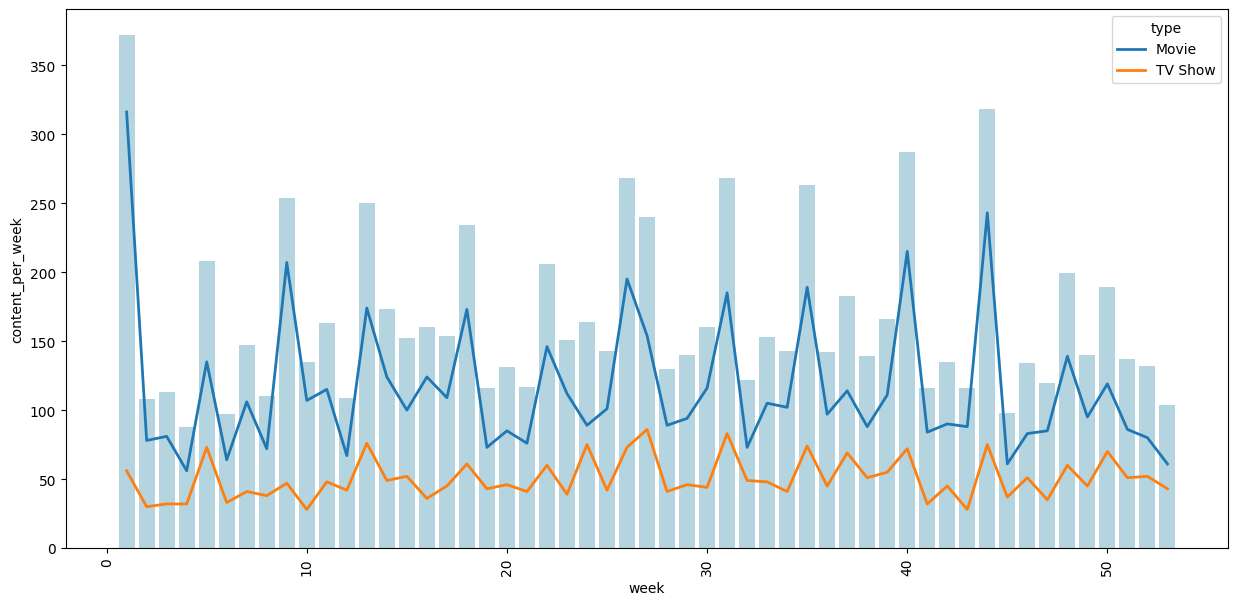

In [ ]:
weekwise_data = pd.DataFrame(netflix['week'].value_counts().reset_index())
weekwise_data.columns = ['week', 'content_per_week']
weekwise_data1 =pd.DataFrame(netflix.groupby(['week', 'type']).agg({'show_id' : 'count'})).reset_index()
weekwise_data1.columns = ['week', 'type', 'count_show_id']

fig, ax = plt.subplots(figsize=(15, 7))

sns.barplot(data = weekwise_data,x = 'week', y = 'content_per_week', ax =ax , color = 'lightblue', native_scale= 0.5)

sns.lineplot(data=weekwise_data1,x = 'week' , y = 'count_show_id' , hue = 'type',ax = ax, linewidth = 2)

x_axis_labels = [tick.get_text() for tick in ax.get_xticklabels()]
ax = plt.gca()
plt.xticks(rotation = 90)
plt.show()

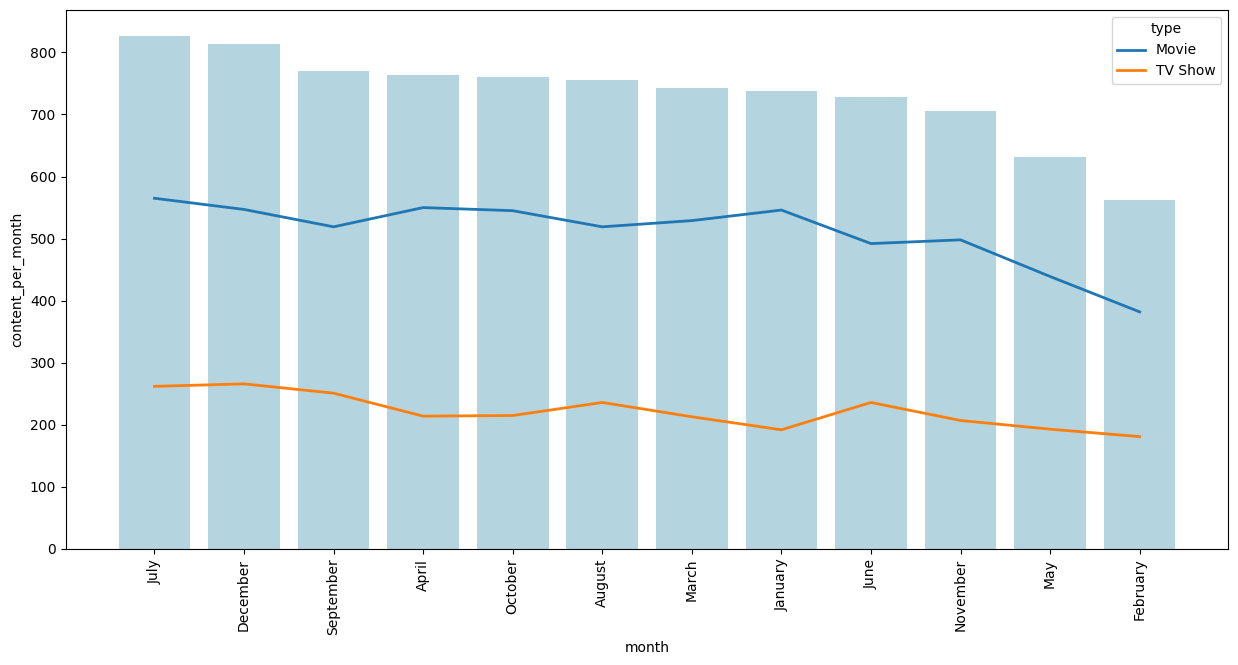

In [ ]:
monthwise_data = pd.DataFrame(netflix['month'].value_counts().reset_index())
monthwise_data.columns = ['month', 'content_per_month']
monthwise_data1 =pd.DataFrame(netflix.groupby(['month', 'type']).agg({'show_id' : 'count'})).reset_index()
monthwise_data1.columns = ['month', 'type', 'count_show_id']

fig, ax = plt.subplots(figsize=(15, 7))

sns.barplot(data = monthwise_data,x = 'month', y = 'content_per_month', ax =ax , color = 'lightblue', native_scale= 0.5)

sns.lineplot(data=monthwise_data1,x = 'month' , y = 'count_show_id' , hue = 'type',ax = ax, linewidth = 2)

x_axis_labels = [tick.get_text() for tick in ax.get_xticklabels()]
ax = plt.gca()
plt.xticks(rotation = 90)
plt.show()

In [ ]:
weekwise_data , weekwise_data1

(    week  content_per_week
 0      1               372
 1     44               318
 2     40               287
 3     31               268
 4     26               268
 5     35               263
 6      9               254
 7     13               250
 8     27               240
 9     18               234
 10     5               208
 11    22               206
 12    48               199
 13    50               189
 14    37               183
 15    14               173
 16    39               166
 17    24               164
 18    11               163
 19    16               160
 20    30               160
 21    17               154
 22    33               153
 23    15               152
 24    23               151
 25     7               147
 26    25               143
 27    34               143
 28    36               142
 29    49               140
 30    29               140
 31    38               139
 32    51               137
 33    10               135
 34    42           

In [ ]:
monthwise_data,monthwise_data1

(        month  content_per_month
 0        July                827
 1    December                813
 2   September                770
 3       April                764
 4     October                760
 5      August                755
 6       March                742
 7     January                738
 8        June                728
 9    November                705
 10        May                632
 11   February                563,
         month     type  count_show_id
 0       April    Movie            550
 1       April  TV Show            214
 2      August    Movie            519
 3      August  TV Show            236
 4    December    Movie            547
 5    December  TV Show            266
 6    February    Movie            382
 7    February  TV Show            181
 8     January    Movie            546
 9     January  TV Show            192
 10       July    Movie            565
 11       July  TV Show            262
 12       June    Movie            492
 13       J

#Unnesting of the data into the new dataframe

In [ ]:
netflix_new = netflix
netflix_new['director'] = netflix_new['director'].str.split(', ')
netflix_new = netflix_new.explode('director')
netflix_new['cast'] = netflix_new['cast'].str.split(', ')
netflix_new = netflix_new.explode('cast')
netflix_new['country'] = netflix_new['country'].str.split(', ')
netflix_new = netflix_new.explode('country')
netflix_new['listed_in'] = netflix_new['listed_in'].str.split(', ')
netflix_new = netflix_new.explode('listed_in')
netflix_new.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year,month,day,week
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown_cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,September,25.0,38
1,s2,TV Show,Blood & Water,Unknown_Director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021.0,September,24.0,38
1,s2,TV Show,Blood & Water,Unknown_Director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t...",2021.0,September,24.0,38
1,s2,TV Show,Blood & Water,Unknown_Director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t...",2021.0,September,24.0,38
1,s2,TV Show,Blood & Water,Unknown_Director,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",2021.0,September,24.0,38


In [ ]:
netflix_new.drop('description', axis = 1,inplace = True)

#finding most common director in TV show and in movies separately (Top 10 in both category) (Univariate)

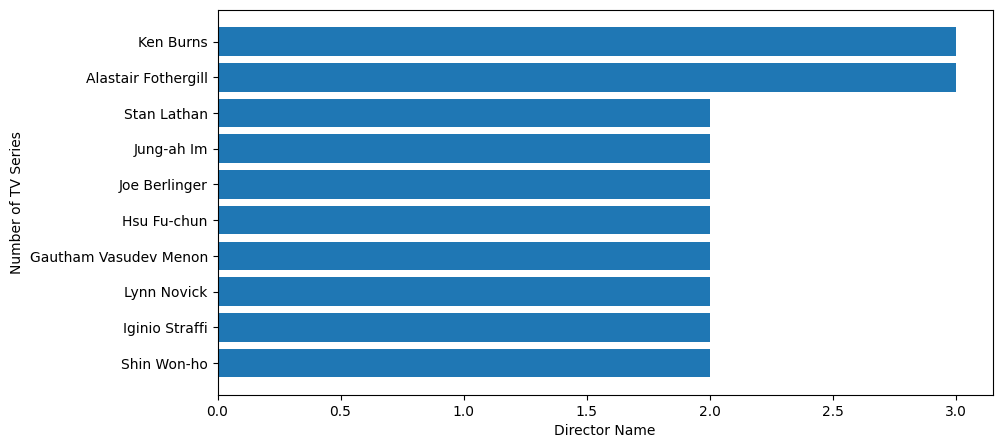

In [ ]:
dir_TV_top = pd.DataFrame(netflix_new.loc[(netflix_new['type'] == 'TV Show') & (netflix_new['director'] != 'Unknown_Director')].groupby('director').agg({'title':'nunique'}))
dir_TV_top = dir_TV_top.reset_index().sort_values('title',ascending = False).iloc[:10,:].iloc[::-1,:]
plt.figure(figsize=(10,5))
plt.barh(dir_TV_top['director'], dir_TV_top['title'])
plt.xlabel('Director Name')
plt.ylabel('Number of TV Series')
plt.show()

In [ ]:
dir_TV_top

,director,title
251,Shin Won-ho,2
103,Iginio Straffi,2
168,Lynn Novick,2
84,Gautham Vasudev Menon,2
100,Hsu Fu-chun,2
128,Joe Berlinger,2
140,Jung-ah Im,2
259,Stan Lathan,2
8,Alastair Fothergill,3
146,Ken Burns,3


#finding most common director in TV show and in movies separately (Top 10 in both category) (Univariate)

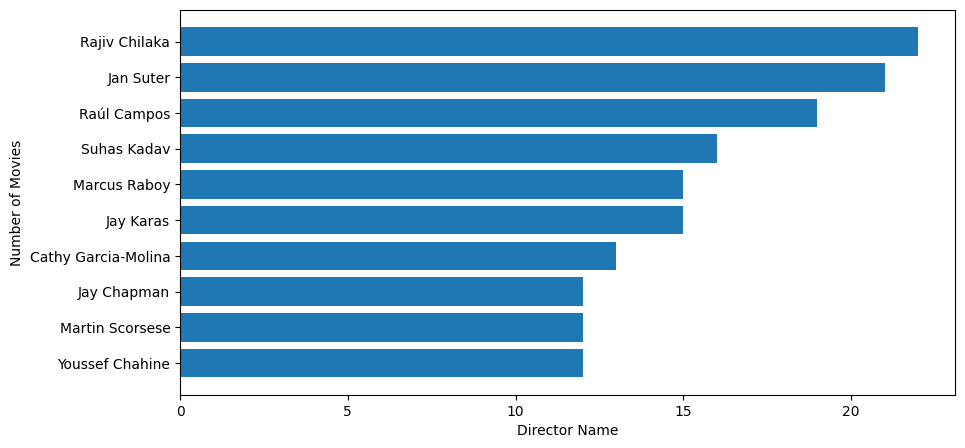

In [ ]:
dir_movie_top = pd.DataFrame(netflix_new.loc[(netflix_new['type'] == 'Movie') & (netflix_new['director'] != 'Unknown_Director')].groupby('director').agg({'title':'nunique'}))
dir_movie_top = dir_movie_top.reset_index().sort_values('title',ascending = False).iloc[:10,:].iloc[::-1,:]
plt.figure(figsize=(10,5))
plt.barh(dir_movie_top['director'], dir_movie_top['title'])
plt.xlabel('Director Name')
plt.ylabel('Number of Movies')
plt.show()

In [ ]:
dir_movie_top

,director,title
4725,Youssef Chahine,12
2815,Martin Scorsese,12
1859,Jay Chapman,12
727,Cathy Garcia-Molina,13
1862,Jay Karas,15
2739,Marcus Raboy,15
4261,Suhas Kadav,16
3633,Raúl Campos,19
1817,Jan Suter,21
3582,Rajiv Chilaka,22


#Genrewise Produced Contents (Univariate)

In [ ]:
netflix_new.rename(columns={'listed_in' : 'Genre'},inplace= True)

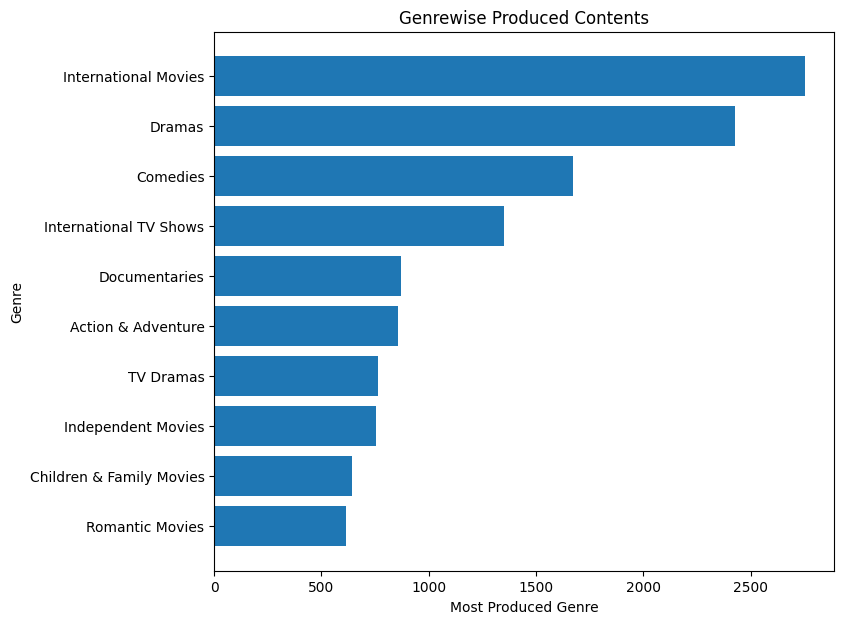

In [ ]:
b = pd.DataFrame(netflix_new.groupby('Genre').agg({'title' : 'nunique'})).sort_values(by = 'title',ascending=False).reset_index()
b = b.iloc[9::-1,:]
plt.figure(figsize=(8,7))
plt.barh(width= b['title'], y = b['Genre'])
plt.ylabel('Genre')
plt.xlabel('Most Produced Genre')
plt.title('Genrewise Produced Contents')
plt.show()

In [ ]:
b

,Genre,title
9,Romantic Movies,616
8,Children & Family Movies,641
7,Independent Movies,756
6,TV Dramas,763
5,Action & Adventure,859
4,Documentaries,869
3,International TV Shows,1351
2,Comedies,1674
1,Dramas,2427
0,International Movies,2752


##Genrewise Produced TV Shows (Univariate)

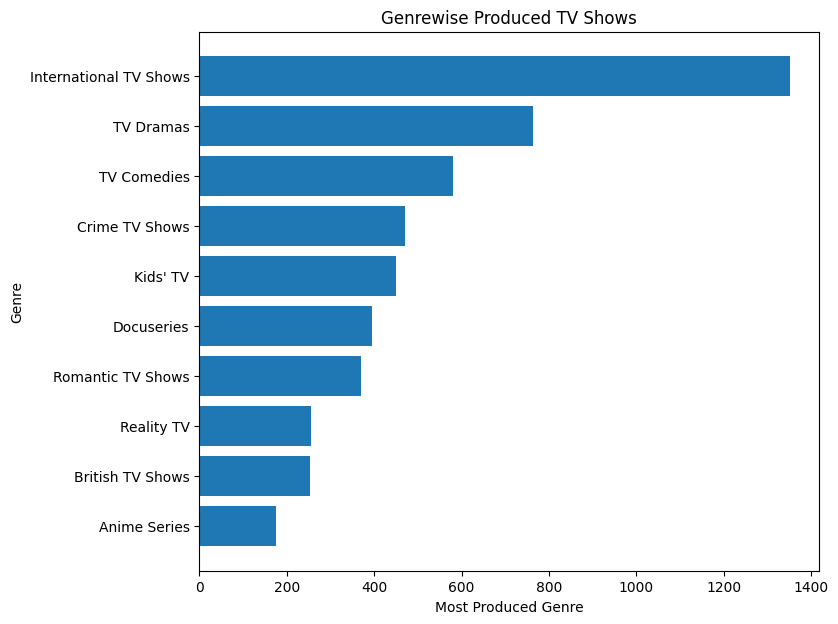

In [ ]:
c = pd.DataFrame(netflix_new[netflix_new['type'] == 'TV Show'].groupby('Genre').agg({'title' : 'nunique'})).sort_values(by = 'title',ascending=False).reset_index()
c = c.iloc[9::-1,:]
plt.figure(figsize=(8,7))
plt.barh(width= c['title'], y = c['Genre'])
plt.ylabel('Genre')
plt.xlabel('Most Produced Genre')
plt.title('Genrewise Produced TV Shows')
plt.show()

In [ ]:
c

,Genre,title
9,Anime Series,176
8,British TV Shows,253
7,Reality TV,255
6,Romantic TV Shows,370
5,Docuseries,395
4,Kids' TV,451
3,Crime TV Shows,470
2,TV Comedies,581
1,TV Dramas,763
0,International TV Shows,1351


##Genrewise Produced Movie (Univariate)

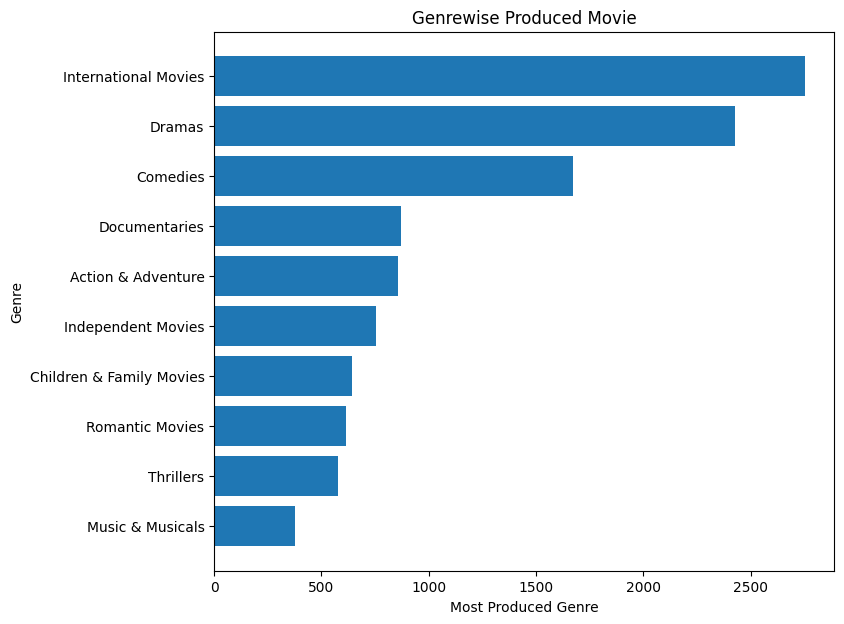

In [ ]:
d = pd.DataFrame(netflix_new[netflix_new['type'] == 'Movie'].groupby('Genre').agg({'title' : 'nunique'})).sort_values(by = 'title',ascending=False).reset_index()
d = d.iloc[9::-1,:]
plt.figure(figsize=(8,7))
plt.barh(width= d['title'], y = d['Genre'])
plt.ylabel('Genre')
plt.xlabel('Most Produced Genre')
plt.title('Genrewise Produced Movie')
plt.show()

In [ ]:
d

,Genre,title
9,Music & Musicals,375
8,Thrillers,577
7,Romantic Movies,616
6,Children & Family Movies,641
5,Independent Movies,756
4,Action & Adventure,859
3,Documentaries,869
2,Comedies,1674
1,Dramas,2427
0,International Movies,2752


#Most Common Actor/Actress across all content types (Univariate)

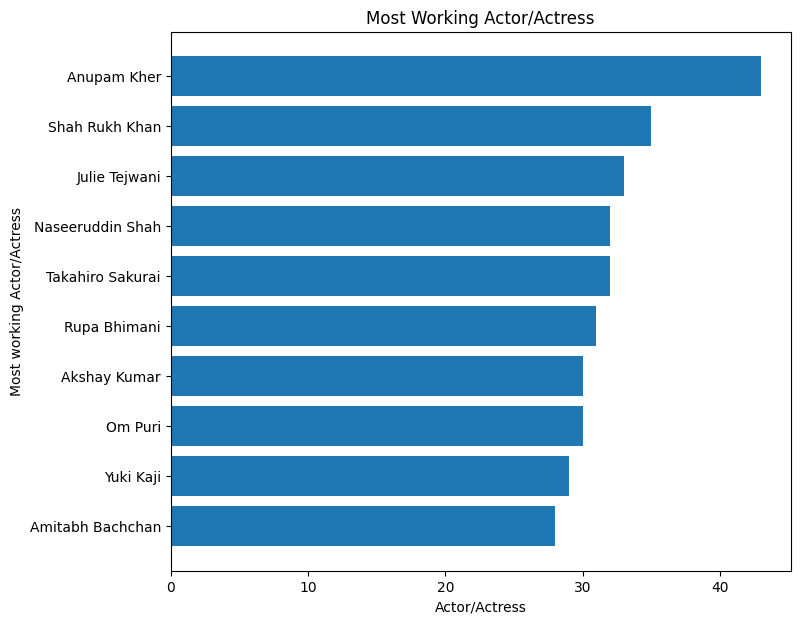

In [ ]:
b_actor = pd.DataFrame(netflix_new.loc[(netflix_new['cast'] != 'Unknown_cast')].groupby('cast').agg({'title' : 'nunique'})).sort_values(by = 'title',ascending=False).reset_index()
b_actor = b_actor.iloc[9::-1,:]
plt.figure(figsize=(8,7))
plt.barh(width= b_actor['title'], y = b_actor['cast'])
plt.xlabel('Actor/Actress')
plt.ylabel('Most working Actor/Actress')
plt.title('Most Working Actor/Actress')
plt.show()

In [ ]:
b_actor

,cast,title
9,Amitabh Bachchan,28
8,Yuki Kaji,29
7,Om Puri,30
6,Akshay Kumar,30
5,Rupa Bhimani,31
4,Takahiro Sakurai,32
3,Naseeruddin Shah,32
2,Julie Tejwani,33
1,Shah Rukh Khan,35
0,Anupam Kher,43


##Most Common Actor/Actress across TV Shows (Univariate)

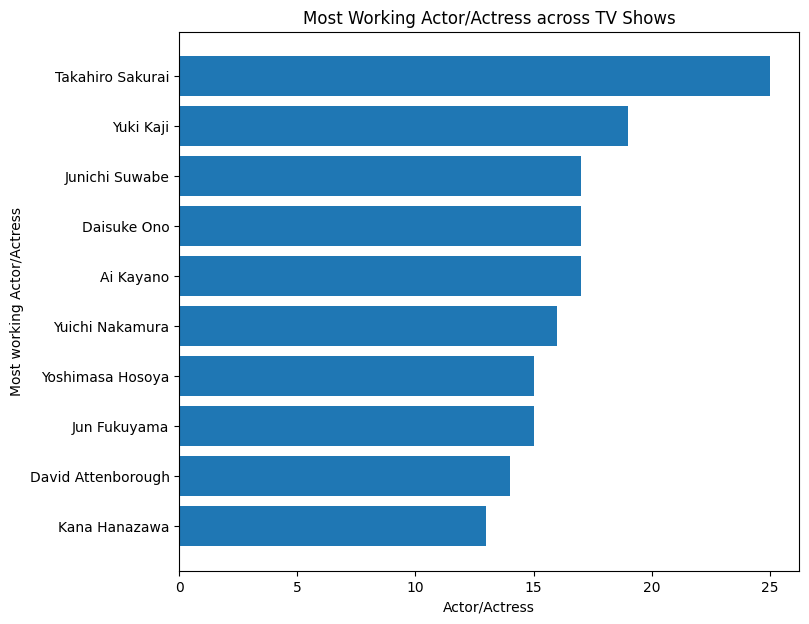

In [ ]:
c_actor = pd.DataFrame(netflix_new.loc[(netflix_new['cast'] != 'Unknown_cast') & (netflix_new['type'] == 'TV Show')].groupby('cast').agg({'title' : 'nunique'})).sort_values(by = 'title',ascending=False).reset_index()
c_actor = c_actor.iloc[9::-1,:]
plt.figure(figsize=(8,7))
plt.barh(width= c_actor['title'], y = c_actor['cast'])
plt.xlabel('Actor/Actress')
plt.ylabel('Most working Actor/Actress')
plt.title('Most Working Actor/Actress across TV Shows')
plt.show()

In [ ]:
c_actor

,cast,title
9,Rupa Bhimani,27
8,Boman Irani,27
7,Julie Tejwani,28
6,Amitabh Bachchan,28
5,Paresh Rawal,28
4,Om Puri,30
3,Akshay Kumar,30
2,Naseeruddin Shah,32
1,Shah Rukh Khan,35
0,Anupam Kher,42


##Most Common Actor/Actress across Movie (Univariate)

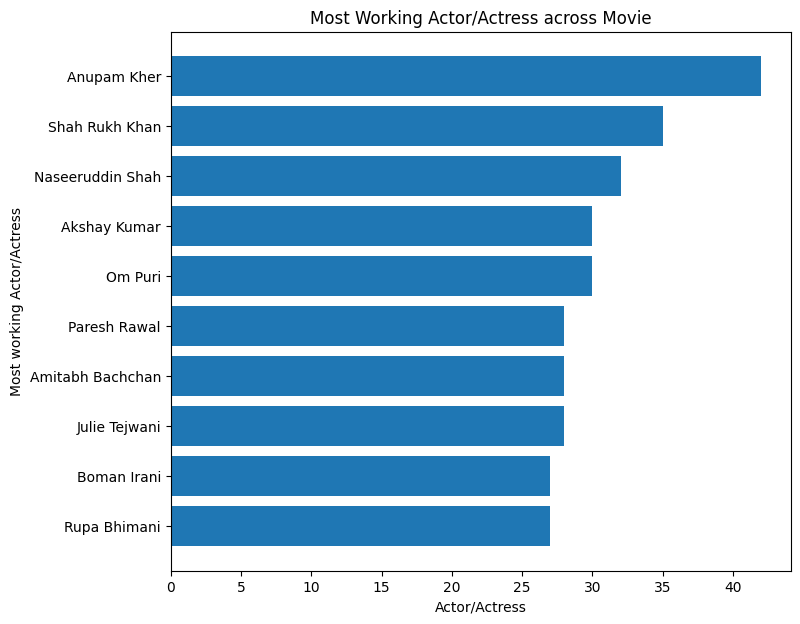

In [ ]:
c_actor = pd.DataFrame(netflix_new.loc[(netflix_new['cast'] != 'Unknown_cast') & (netflix_new['type'] == 'Movie')].groupby('cast').agg({'title' : 'nunique'})).sort_values(by = 'title',ascending=False).reset_index()
c_actor = c_actor.iloc[9::-1,:]
plt.figure(figsize=(8,7))
plt.barh(width= c_actor['title'], y = c_actor['cast'])
plt.xlabel('Actor/Actress')
plt.ylabel('Most working Actor/Actress')
plt.title('Most Working Actor/Actress across Movie')
plt.show()

#Release Time vs Platform release time Analysis (Bivariate)

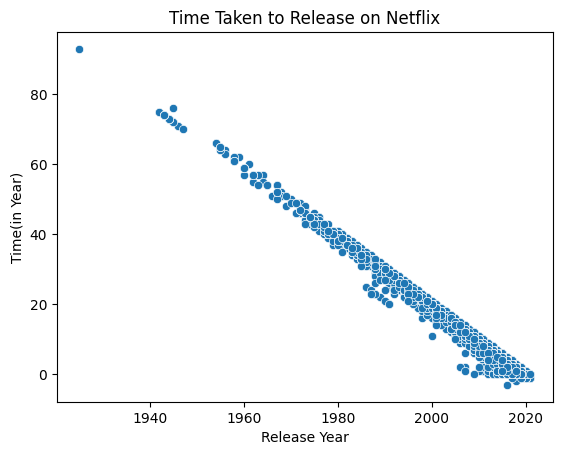

In [ ]:
netflix['time_diff'] = (netflix['year']-netflix['release_year'])
sns.scatterplot(data = netflix, x = 'release_year', y = 'time_diff')
plt.xlabel('Release Year')
plt.ylabel('Time(in Year)')
plt.title('Time Taken to Release on Netflix')
plt.show()

In [ ]:
netflix['time_diff']

0        1.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
8802    12.0
8803     1.0
8804    10.0
8805    14.0
8806     4.0
Name: time_diff, Length: 8807, dtype: float64

In [ ]:
netflix_new['duration'] = netflix_new['duration'].str.lower()

In [ ]:
tv_duration = pd.DataFrame(netflix_new[netflix['type'] == 'TV Show'].groupby('duration').agg({'title':'nunique'})).sort_values('title',ascending = False).reset_index()
tv_duration.rename(columns= {'title' : 'duration_count'},inplace= True)
print(tv_duration)

      duration  duration_count
0     1 season            1793
1    2 seasons             425
2    3 seasons             199
3    4 seasons              95
4    5 seasons              65
5    6 seasons              33
6    7 seasons              23
7    8 seasons              17
8    9 seasons               9
9   10 seasons               7
10  13 seasons               3
11  11 seasons               2
12  12 seasons               2
13  15 seasons               2
14  17 seasons               1


<ipython-input-102-7c430145e7b2>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tv_duration = pd.DataFrame(netflix_new[netflix['type'] == 'TV Show'].groupby('duration').agg({'title':'nunique'})).sort_values('title',ascending = False).reset_index()


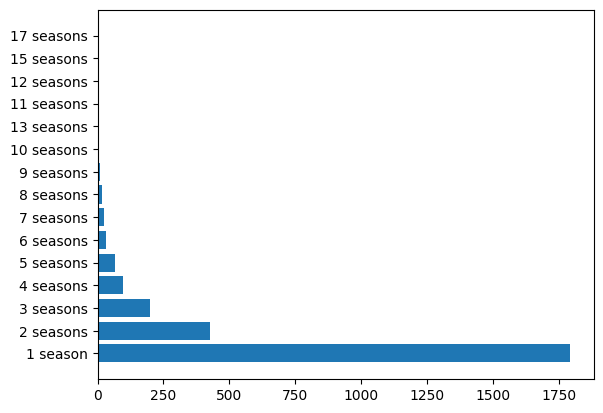

In [ ]:
plt.barh(width = tv_duration['duration_count'], y =tv_duration['duration'])
plt.show()

In [ ]:
mv_duration = pd.DataFrame(netflix_new[netflix['type'] == 'Movie'].groupby('duration').agg({'title':'nunique'})).sort_values('title',ascending = False).reset_index()
mv_duration.rename(columns= {'title' : 'duration_count'},inplace= True)
mv_duration['duration'] = mv_duration['duration'].astype(str).str.replace(r'\s*mins?$', '', regex=True)
mv_duration['duration'] = mv_duration['duration'].astype(int)
bins = [0,20,40,60,90,120,150,330]
labels = ['0-20','21-40','41-60','61-90','91-120','121-150','150-max']
mv_duration['time_category'] = pd.cut(mv_duration['duration'],bins = bins, labels = labels)
mv_duration.drop('duration',axis = 1,inplace = True)
mv_duration = pd.DataFrame(mv_duration.groupby('time_category').agg({'duration_count' : 'sum'})).sort_values('duration_count').reset_index()
print(mv_duration)

  time_category  duration_count
0          0-20              28
1         21-40             155
2       150-max             245
3         41-60             304
4       121-150             897
5         61-90            1506
6        91-120            2996


<ipython-input-116-011214feecfe>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mv_duration = pd.DataFrame(netflix_new[netflix['type'] == 'Movie'].groupby('duration').agg({'title':'nunique'})).sort_values('title',ascending = False).reset_index()


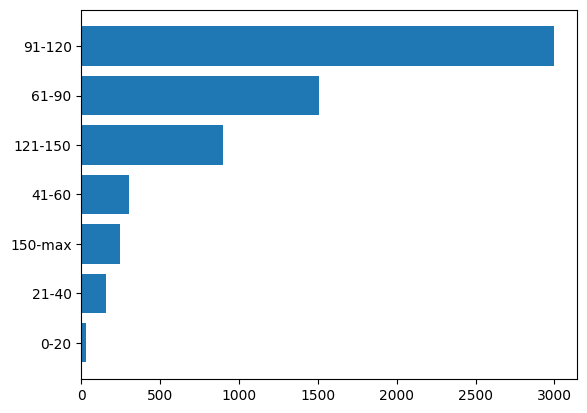

In [ ]:
plt.barh(width = mv_duration['duration_count'],y = mv_duration['time_category'])
plt.show()

#Conclusion

1) Content aligned to Drama, Comedy, and International TV Shows/Movies, the most popular genres across countries and platforms, is highly recommended.

2) Consistently adding TV Shows/Movies in the 1st and 3rd weeks of every month is advisable (with 15 days gap), with special emphasis on July and December for content addition(This aligns with Holiday seasons). Regional releases to be aligned the regional Holiday seasons. February is the least recommended month for new additions.

3) While prioritizing content, focus on countries with high content consumption like USA and India. Additionally, consider exploring untapped potential in countries such as Nicaragua, Dominican Republic, Somalia, Sudan, and Paraguay.

4) Aim for TV Shows with a duration of 1-2 seasons and movies with a duration of 1.5-1.6 hours.

5) Programming with ratings such as 'TV-MA' or 'TV-14' should be prioritized, as they are highly watched.

6) Since the overall addition of content has declined post-COVID, it's crucial to upscale content creation efforts.

7) Themes like Love, Christmas, Story, Life, World, Family, Friends, and Adventure are highly sought after on the platform. Creating wholesome content catering to these themes for a broad audience is recommended.

8) Despite the current movie consumption trend, there's an opportunity to tap into the untapped market of TV Shows, especially in content-consuming hubs like USA and India.

9) International Movies, followed by Dramas, Comedies, and Documentaries, are fairly consumed categories. Continuing to produce content in these genres is highly recommended.

10) Consider featuring popular actors and directors while creating content to attract viewership.
